In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scripts.visualize import load_experiment, load_baseline
import pkufiber as pf
from pkufiber.dsp.nonlinear_compensation.loss import  avg_phase 
import torch
import numpy as np
import seaborn as sns

def rotation_qfactor(path):
    qfactor = []
    pch = range(-3, 5)
    for i in pch:
        x = np.load(path+f'/results/x_{i}dBm.npy')
        y = np.load(path+f'/results/y_{i}dBm.npy')
        theta = torch.mean(avg_phase(torch.tensor(x), torch.tensor(y)))
        qfactor.append(pf.qfactor_all(np.concatenate(y, axis=0)*np.exp(1j*theta.item()), np.concatenate(x, axis=0)))
    return qfactor, pch

def origin_qfactor(path):
    res = load_experiment(path)
    return res['qfactor_power'][0], res['qfactor_power'][1]


def plot_qfactor_vs_power(data_paths, method_labels):
    """Plot Q-factor vs. power consumption for different methods.
    
    Args:
        data_paths (dict): Dictionary of paths to experimental data files.
        method_labels (dict): Mapping of data paths to display labels.
    """
    # Load experimental results
    experimental_results = {
        path: load_experiment(path) for path in data_paths
    }

    # Initialize figure with publication-quality settings
    plt.figure(dpi=300, figsize=(8, 6))
    
    # Plot experimental results
    for path, results in experimental_results.items():
        qfactor, power = rotation_qfactor(path)  # or use results['qfactor_power']
        plt.plot(
            power, 
            qfactor, 
            '-o', 
            label=method_labels[path],
            markersize=6,
            linewidth=1.5
        )
        print(f"{method_labels[path]} - RMPS: {results['model'].rmps():.2f}, "
              f"Best Q-factor: {np.max(qfactor):.2f} dB")

    # Plot CDC baseline
    cdc_qfactor, cdc_power = load_baseline('configs/dsp/test_eq.yaml', 'CDC')
    plt.plot(
        cdc_power, 
        cdc_qfactor, 
        '--o', 
        label='CDC Baseline',
        markersize=6,
        linewidth=1.5,
        color='gray'  # Distinct color for baseline
    )

    # Configure plot aesthetics
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xlabel('Power Consumption (mW)', fontsize=12)
    plt.ylabel('Q-factor (dB)', fontsize=12)
    plt.ylim(6, 9)
    plt.yticks(np.arange(6, 9.1, 0.5))  # More readable tick spacing
    
    # Enhanced legend
    plt.legend(
        loc='upper left',
        fontsize=11,
        frameon=True,
        framealpha=0.9,
        edgecolor='black'
    )
    
    # Remove top/right spines for cleaner look
    sns.despine()
    
    # Use tight layout to prevent label clipping
    plt.tight_layout()
    
    # Uncomment to save publication-ready figure
    # plt.savefig('figures/qfactor_vs_power.pdf', 
    #             bbox_inches='tight', 
    #             dpi=300,
    #             format='pdf')

root = '/home/xiaoxinyu/pkufiber/'
paths = [
    root+'experiments/1025/1025_eqfdbp_step5_dtaps801_ntaps401_pretrainD1_trainD1',
    root+'experiments/1025/1025_eqfdbp_step10_dtaps801_ntaps401_pretrainD1_trainD1',
    root+'experiments/1025/1025_eqsnsedbp_effective_step5_dtaps801_ntaps401_pretrainD1_trainD1_D160w_lr1e-4_fixfwm0',
    root+'experiments/1025/1025_eqsnsedbp_effective_step5_dtaps801_ntaps401_pretrainD1_trainD1_D160w_lr1e-4_fixfwm1',
    ]
labels = {
    root+'experiments/1025/1025_eqfdbp_step5_dtaps801_ntaps401_pretrainD1_trainD1': 'FDBP step=5  (RMPS=560)',
    root+'experiments/1025/1025_eqfdbp_step10_dtaps801_ntaps401_pretrainD1_trainD1': 'FDBP step=10 (RMPS=1050)',
    root+'experiments/1025/1025_eqsnsedbp_effective_step5_dtaps801_ntaps401_pretrainD1_trainD1_D160w_lr1e-4_fixfwm0': 'SNSE-DBP step=5, K=0 (RMPS=642)',
    root+'experiments/1025/1025_eqsnsedbp_effective_step5_dtaps801_ntaps401_pretrainD1_trainD1_D160w_lr1e-4_fixfwm1': 'SNSE-DBP step=5, K=1 (RMPS=1283)'
}

# plot_qfactor_vs_power(paths, labels)

In [2]:

experimental_results = {
    path: load_experiment(path) for path in paths
}

FDBP step=5  (RMPS=560) - RMPS: 559.48, Best Q-factor: 8.62 dB
FDBP step=10 (RMPS=1050) - RMPS: 1050.85, Best Q-factor: 8.75 dB
SNSE-DBP step=5, K=0 (RMPS=642) - RMPS: 642.10, Best Q-factor: 8.75 dB
SNSE-DBP step=5, K=1 (RMPS=1283) - RMPS: 1283.09, Best Q-factor: 8.91 dB


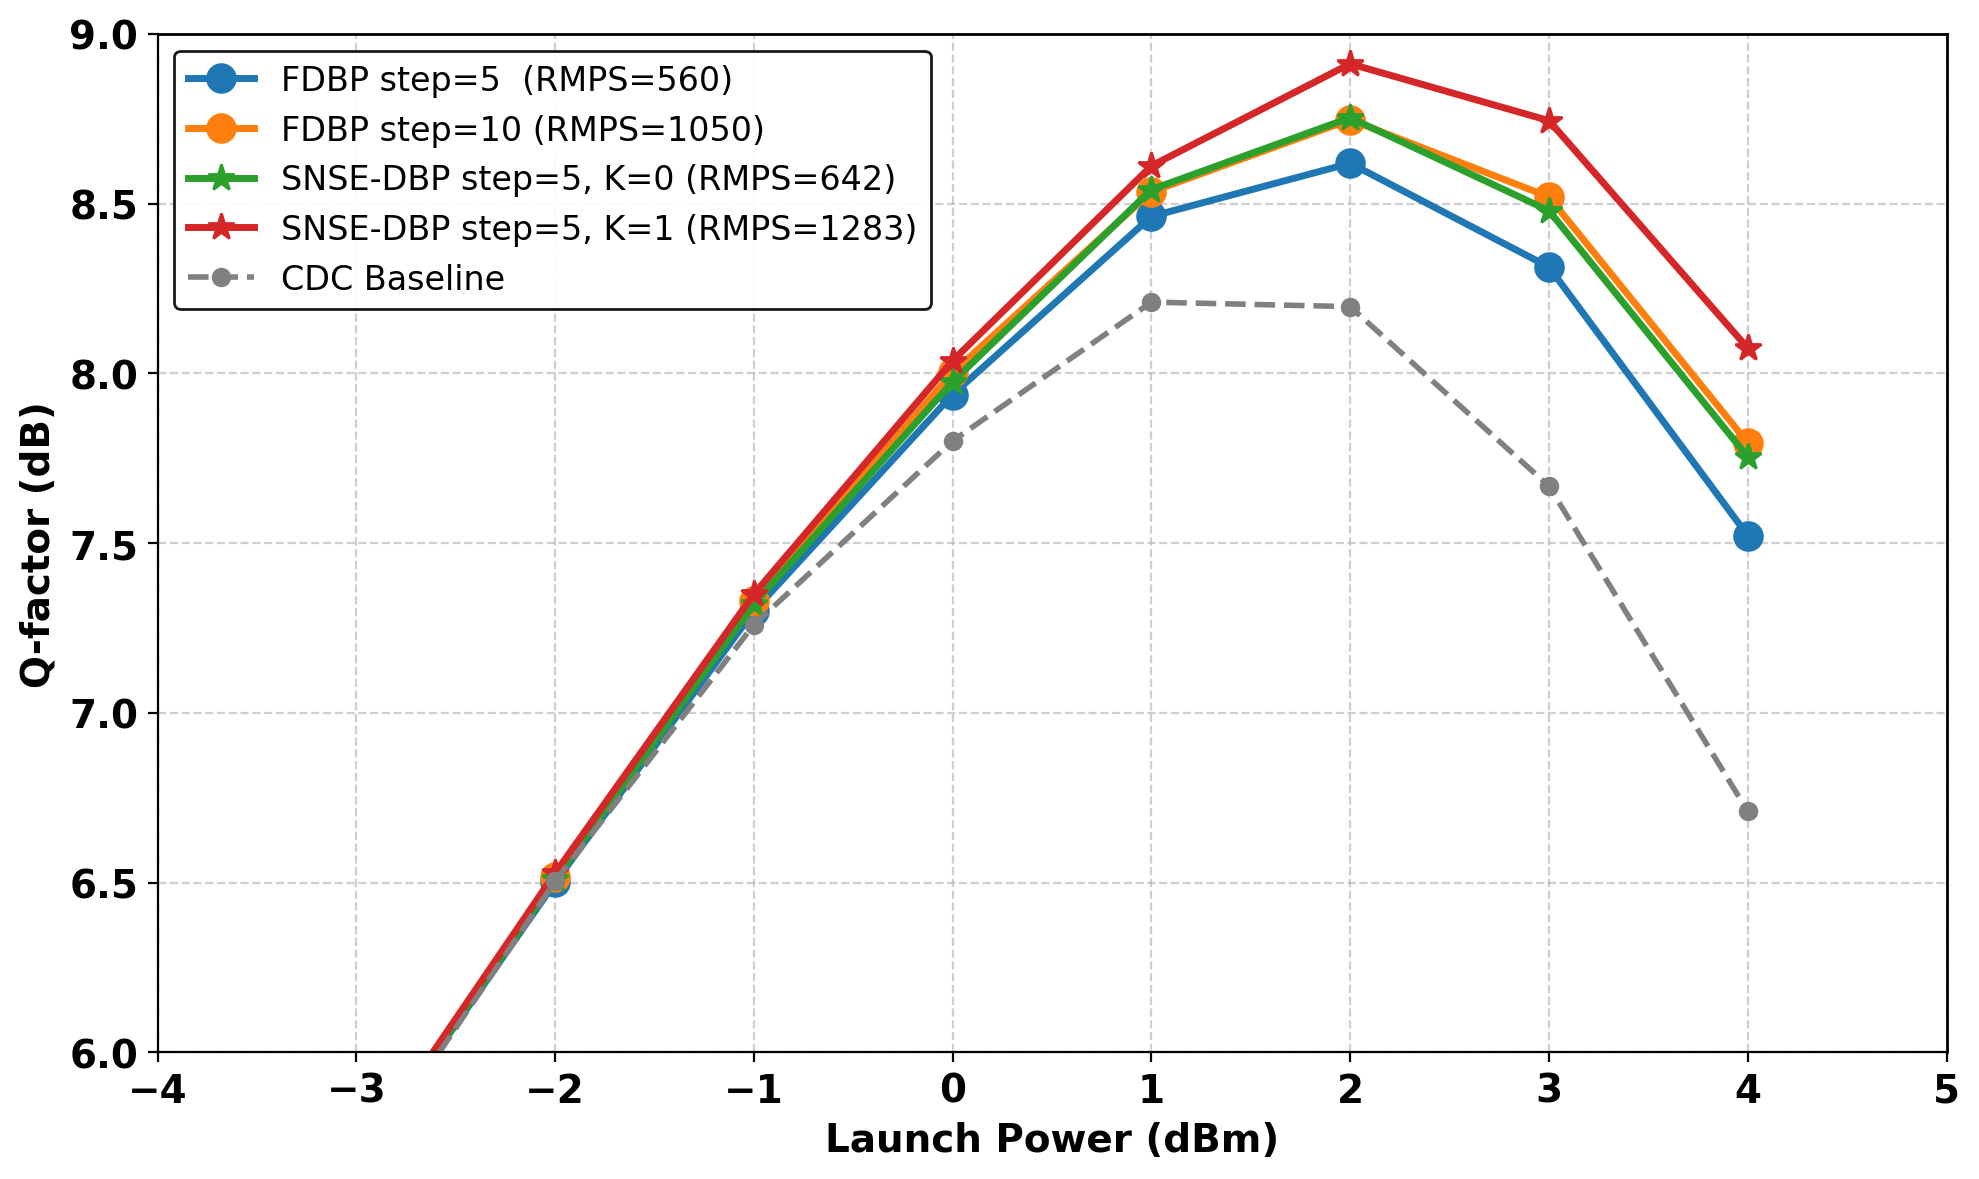

In [3]:

# Initialize figure with publication-quality settings
plt.figure(dpi=200, figsize=(10, 6))

# Plot experimental results
for path, results in experimental_results.items():
    qfactor, power = rotation_qfactor(path)  # or use results['qfactor_power']
    if 'fdbp' in path:
        plt.plot(
            power, 
            qfactor, 
            '-o', 
            label=labels[path],
            markersize=10,
            linewidth=2.5
        )
    elif 'snse' in path:
        plt.plot(
            power, 
            qfactor, 
            '-*', 
            markersize=10,
            linewidth=2.5,
            label=labels[path],
        )
    print(f"{labels[path]} - RMPS: {results['model'].rmps():.2f}, "
          f"Best Q-factor: {np.max(qfactor):.2f} dB")

# Plot CDC baseline
cdc_qfactor, cdc_power = load_baseline('configs/dsp/test_eq.yaml', 'CDC')
plt.plot(
    cdc_power, 
    cdc_qfactor, 
    '--o', 
    label='CDC Baseline',
    markersize=6,
    linewidth=2,
    color='gray'  # Distinct color for baseline
)

# Configure plot aesthetics
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel('Launch Power (dBm)', fontsize=14, weight='bold')
plt.ylabel('Q-factor (dB)', fontsize=14, weight='bold')
plt.ylim(6.5, 9)
plt.xlim(-4, 5)
plt.xticks(fontsize=14, weight='bold')
plt.yticks(np.arange(6, 9.1, 0.5), fontsize=14, weight='bold')  # More readable tick spacing

# Enhanced legend
plt.legend(
    loc='upper left',
    fontsize=12,
    frameon=True,
    framealpha=0.9,
    edgecolor='black'
)

# 显示顶部和右侧边框（实线）
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')

# 可选：如果你也想设置左边和下边框的样式
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

# Use tight layout to prevent label clipping
plt.tight_layout()

# Save the image
plt.savefig('fig/fig12.png')

# Uncomment to save publication-ready figure
# plt.savefig('figures/qfactor_vs_power.pdf', 
#             bbox_inches='tight', 
#             dpi=300,
#             format='pdf')

# plt.show()  # 如果你想显示图像